# Applying PCA to 3D data to convert it from 3D to 2D.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
np.random.seed(2343243)  #so that everytime, I run the code, I get the same data.

In [5]:
mean_vec1 = np.array([0, 0, 0])  #mean 
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  #covariance matrix
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 100)  #class 1 is of 100 points.

In [6]:
mean_vec2 = np.array([1, 1, 1])  #mean 
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  #covariance matrix
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 100)  #class 2 is of 100 points.

In [8]:
from mpl_toolkits.mplot3d import Axes3D, proj3d

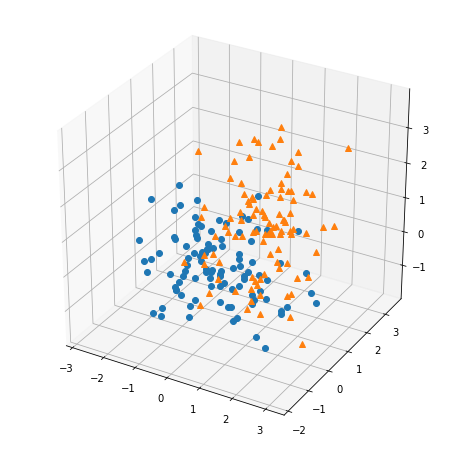

In [9]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')  #adding subplot to 1*1 grid at 1st position
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o')
ax.plot(class2[:, 0], class2[:, 1], class2[:, 2], '^')
plt.show()

# Moving the 3D data to 2D data

In [10]:
all_data = np.concatenate((class1, class2))

In [11]:
pca = PCA(n_components = 2)  #if we dont pass n_components then we will not get the reduced features
transformed_data  = pca.fit_transform(all_data)
transformed_data

array([[-0.52351425, -0.63301617],
       [-0.78786184,  0.94206431],
       [-1.28725924,  0.54439067],
       [ 0.66747707,  1.69846274],
       [-1.74150174, -0.755306  ],
       [-1.03559449, -1.53950125],
       [-0.21765053, -0.85555712],
       [-0.7648506 , -0.46590375],
       [-0.64255217,  1.16920769],
       [-0.5783154 , -0.30888845],
       [ 0.25251683, -0.38101091],
       [-0.26298255, -0.44282938],
       [-0.86147962,  0.21339394],
       [-0.9917517 , -0.32293363],
       [-1.3133147 ,  0.01268907],
       [-1.09145198, -0.50248537],
       [-2.05840949, -1.13678107],
       [-0.62975084, -1.78591257],
       [-1.75005325, -1.27909834],
       [-0.66142546,  1.66188479],
       [-0.34624366,  0.47524286],
       [ 0.77989322,  0.76153114],
       [-0.22203858, -0.7362751 ],
       [-1.06469867,  0.33693758],
       [-1.93640401, -0.97234577],
       [-2.44237038, -0.34276504],
       [-1.7918403 ,  0.40615644],
       [ 0.33656537,  1.36869154],
       [-1.38894876,

In [12]:
pca.components_

array([[ 0.41124564,  0.64810013,  0.64097055],
       [ 0.91063567, -0.26106644, -0.32029202]])

# Plotting the 2D data in 2D

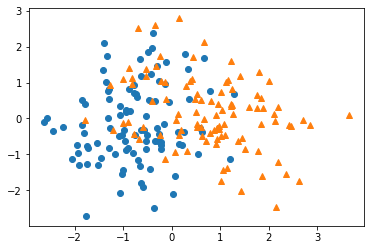

In [14]:
plt.plot(transformed_data[:100, 0], transformed_data[:100, 1], "o")  #first 100 rows were class1 
plt.plot(transformed_data[100: 200, 0], transformed_data[100:200, 1], "^")  #next 100 rows were class2
plt.show()

# Applying Inverse transform on this transformed data

In [15]:
X_approx = pca.inverse_transform(transformed_data)
X_approx  #This data is not exactly same as our original data, it is similar to it as it has some losses in it as we have lost some columns by conerting from 3D to 2D.

array([[-3.35664295e-01,  4.13176049e-01,  3.02295557e-01],
       [ 9.89948385e-01, -1.69348317e-01, -3.71629178e-01],
       [ 4.22437580e-01, -3.89188594e-01, -5.64356504e-01],
       [ 2.27725356e+00,  5.76386779e-01,  3.18931815e-01],
       [-9.47917821e-01, -3.44276035e-01, -4.39230092e-01],
       [-1.37173271e+00,  3.17949615e-01,  2.64407149e-01],
       [-4.12532897e-01,  6.69504342e-01,  5.69623284e-01],
       [-2.82734282e-01,  2.13138481e-01,  9.40812870e-02],
       [ 1.25655122e+00, -1.34472617e-01, -3.51242174e-01],
       [-6.30387695e-02,  2.93040543e-01,  1.63354108e-01],
       [ 2.12960082e-01,  8.50331775e-01,  7.18993342e-01],
       [-5.53308896e-02,  5.32375288e-01,  4.08373388e-01],
       [ 2.96120162e-01, -2.68286325e-02, -1.85428702e-01],
       [-2.45852686e-01,  2.87591482e-02, -9.71478230e-02],
       [-7.24640551e-02, -2.67265701e-01, -4.10757511e-01],
       [-4.50360202e-01,  1.10183186e-02, -1.03543775e-01],
       [-1.42562955e+00, -4.50073651e-01

# Plotting the 2D plane in 3D graph

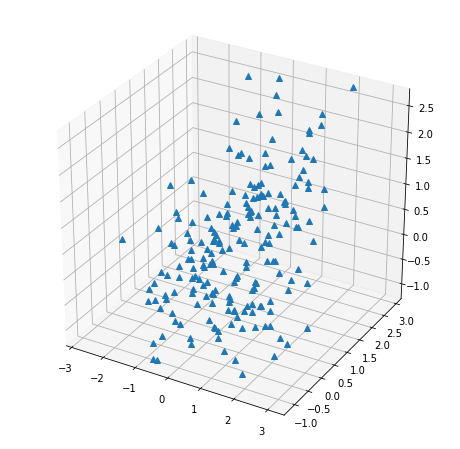

In [16]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')  #adding subplot to 1*1 grid at 1st position
ax.plot(X_approx[:, 0], X_approx[:, 1], X_approx[:, 2], '^')
plt.show()